Kaggle Data set TITANIC.

Scope of the analysis: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die

Let's start by importing the libraries

In [1]:
# import the library necessary to analyse the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data
df=pd.read_csv('./data/train.csv')

In [3]:
#let's see the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Let's see what kind of data are present in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# The passenger ID is a unique identifier for each passenger and it would be later necessary to compare who survived and who did not.
# The Survived column is the target variable, where 1 indicates survival and 0 indicates death.
# The Pclass column represents the passenger class (1st, 2nd, or 3rd), which is a categorical variable.
# The Name column contains the names of the passengers, which is not directly useful for analysis but can be used for feature engineering.
# The sex column is a categorical variable indicating the gender of the passengers.
# The Age column contains the ages of the passengers, which is a continuous variable. As we can see some values are missing.
# The SibSp column represents the number of siblings or spouses aboard the Titanic, which is a discrete variable.
# The Parch column represents the number of parents or children aboard the Titanic, which is also a discrete variable.
# The Ticket column contains the ticket numbers of the passengers, which is not directly useful for analysis.
# The Fare column contains the fare prices paid by the passengers, which is a continuous variable.
# The Cabin column contains the cabin numbers of the passengers, which is not directly useful for analysis.
# The Embarked column represents the port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton), which is a categorical variable.

In [7]:
# It is necessary to preprocess the data before feeding it into the model.
# This includes handling missing values, encoding categorical variables, and scaling numerical features.
# let's start by handling missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# The cabin column is missing a lot of values, we can drop it
df = df.drop("Cabin", axis=1)


In [9]:
# the age column has missing values, we can fill them with the median age
df["Age"] = df["Age"].fillna(df["Age"].median())


In [10]:
# the embarked column has missing values, we can fill them with the mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [11]:
# it is necessary to encode categorical variables such as sex and embarked. Sex is divided in male and female and can be represented as 0 and 1.
df['Sex']=df['Sex'].map({'male': 0, 'female': 1})
# dummies for the Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [12]:
# the names, the ticket and the fare columns are not useful for the model
df = df.drop(["Name", "Ticket", "Fare"], axis=1)


In [13]:
# There are information about the number of siblings and parents aboard the Titanic. It can be used as features for the model. 
# Let's introduce the Family size and drop the the sibling and parents column
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df = df.drop(["SibSp", "Parch"], axis=1)


In [14]:
# The passenger ID do not bring useful information to determinate survival, but it is necessary later to submit the results and associate them with the survival.
# Let's save it in another DataFrame
passenger_id = df["PassengerId"]
df = df.drop(["PassengerId"], axis=1)


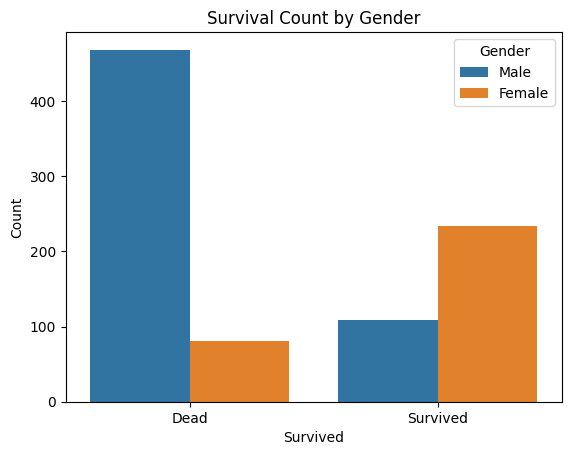

In [15]:
# It is known that women were let off the Titanic first, this may be seen easily using graphs
# Let's identify the presence of patterns
# Are women or men more likely to survive?
sns.countplot(x="Survived", hue="Sex", data=df)
# let's use blue and red as color for the barsplot
sns.set_palette(["blue", "red"])
#Let's change the axis labels and title so it shows the survival rate by gender and x say dead instead of 0 and survived in case of 1
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.xticks(ticks=[0, 1], labels=["Dead", "Survived"])
plt.legend(title="Gender", labels=["Male", "Female"])

plt.show()


## we see a pattern

It doesn't say anything that we didn't know from history and the movie

In [16]:
# Let's make our model
# Since it is a problem focused on two outcomes: survival and death, we can use logistic regression
from sklearn.linear_model import LogisticRegression
# we need the train test split function to train it
from sklearn.model_selection import train_test_split
# the metrics to check the precision, the accurancy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, auc, roc_curve, classification_report, roc_auc_score

In [17]:
# Let's start by preparing features and variable. The survival variable is the target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [18]:
#Let's make the split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
# Let's create the model
model_log = LogisticRegression()
# Let's train the model
model_log.fit(X_train, y_train)


LogisticRegression()

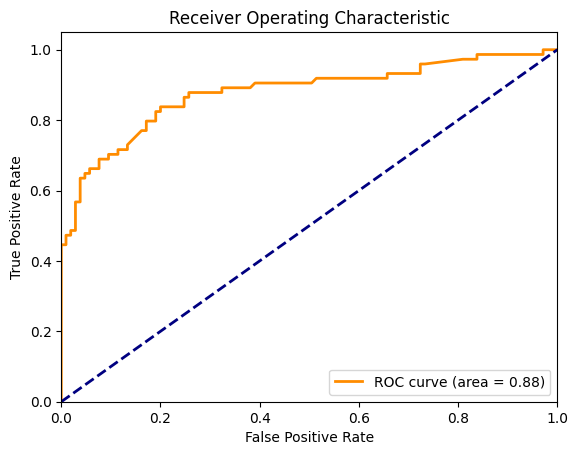

In [20]:
# Let's check the AUC curve and let's plot it
y_probs = model_log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Let's check the classification report and print it
y_pred = model_log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



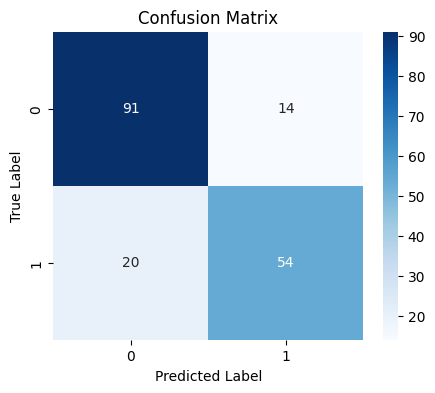

In [22]:
# Let's define and  plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
# Let's test the model using the test.csv data set
test_df = pd.read_csv('./data/test.csv')
# Let's data engineer the test set in the same way as we did with the training set
test_df = test_df.drop("Cabin", axis=1)
# Fixing the Age missing data
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
# Fixing the missing Embarked data
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])
# Categorizing the sex and the embarked
test_df['Sex']=test_df['Sex'].map({'male': 0, 'female': 1})
# Dummies for the Embarked
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)
# dropping unnecessary columns
test_df = test_df.drop(["Name", "Ticket", "Fare"], axis=1)
# creating the FamilySize feature
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
# dropping unnecessary columns
test_df = test_df.drop(["SibSp", "Parch"], axis=1)
# dropping the PassengerId column and save it
passenger_id_test = test_df["PassengerId"]
test_df = test_df.drop(["PassengerId"], axis=1)

In [24]:
# We run the model on the test set test_df to predict the survival
predictions = model_log.predict(test_df)


In [25]:
# Prepare the output
output = pd.DataFrame({'PassengerId': passenger_id_test, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
